In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
ref_data = '''
#    mol     CCSD(T)        AFQMC/CISD        CCSDT             REF             AFQMC/HF
    B2  -49.27052714	-49.2703	0.0001	  -49.27227087	  -49.27384491   -49.2657     0.0003    
    BN  -79.20597437	-79.2016	0.0003	  -79.20331193	  -79.20554682   -79.2030     0.0007 
    C2  -75.72647775	-75.7239	0.0002	  -75.72512044	  -75.72771005   -75.7320     0.0006    
  Cl2O  -994.2163018	-994.2181	0.0001	  -994.21674      -994.2184489   -994.2192	  0.0003
  ClF3  -758.2800536	-758.2834	0.0002	  -758.2808	      -758.283304    -758.2896    0.0004
  ClF5  -957.35520	-957.3607	0.0003   -957.35607      -957.36014     -957.36640	  0.0005
  ClO3  -684.41612	-684.4175	0.0002   -684.41624      -684.41830     -684.41730	  0.0004
  ClOO  -609.57907	-609.5844	0.0002   -609.58164      -609.58568     -609.58540	  0.0003
ClOOCl  -1069.18631	-1069.1891	0.0002   -1069.18686     -1069.18970    -1069.19200   0.0004
   F2O  -274.0716236	-274.0736	0.0002	  -274.0721846	  -274.0745163   -274.0754	  0.0004
   FO2  -249.51577	-249.5208	0.0003   -249.51757      -249.52168     -249.52380	  0.0003
  FOOF  -349.05618	-349.0601	0.0003   -349.05729      -349.06210     -349.06230	  0.0003
    O3  -224.909286 	-224.9128	0.0003	  -224.9094075	  -224.9147591   -224.91580	  0.0003
  OClO  -609.5055511	-609.5073	0.0003	  -609.50591      -609.5086808   -609.5099	  0.0004
    OF  -174.4980385	-174.49914	0.00009	  -174.4991431	  -174.5001424   -174.5005	  0.0002
    S3  -1192.993221	-1192.9958	0.0002	  -1192.9942896	  -1192.996996   -1192.9958	  0.0002
    S4  -1590.67082	-1590.6767	0.0003   -1590.67150     -1590.67690    -1590.67840   0.0003
'''

In [11]:
data_dict = {}
mols = []
for line in ref_data.splitlines():
    if not line.startswith('#'):
        if len(line) > 0 :
            parts = line.split()
            mol = parts[0]
            mols = np.hstack((mols,mol))
            data_dict[mol] = {}
            data_dict[mol]['ccsd_t'] = float(parts[1])
            data_dict[mol]['afqmc_cisd'] = float(parts[2])
            data_dict[mol]['afqmc_cisd_err'] = float(parts[3])
            data_dict[mol]['ccsdt'] = float(parts[4])
            data_dict[mol]['ref'] = float(parts[5])
            data_dict[mol]['afqmc_hf'] = float(parts[6])
            data_dict[mol]['afqmc_hf_err'] = float(parts[7])

In [4]:
my_data = '''
# mol       AFQMC/CCSD_PT               AFQMC/CCSD_PT2
B2        -49.270414 +/- 0.000068     -49.271836 +/- 0.000072
BN        -79.188014 +/- 0.000091     -79.187229 +/- 0.000102
C2        -75.716958 +/- 0.000121     -75.725098 +/- 0.000155
Cl2O      -994.217511 +/- 0.000106    -994.217741 +/- 0.000106
ClF3      -758.282142 +/- 0.000145    -758.281907 +/- 0.000168
ClF5      -957.358852 +/- 0.000267    -957.358593 +/- 0.000292
ClO3      -684.418089 +/- 0.000190    -684.417725 +/- 0.000218
ClOO      -609.582523 +/- 0.000140    -609.579925 +/- 0.000152
ClOOCl    -1069.067777 +/- 0.000159   -1069.068459 +/- 0.000157
F2O       -274.073272 +/- 0.000167    -274.072819 +/- 0.000153
FO2       -249.516703 +/- 0.000149    -249.520278 +/- 0.000155
FOOF      -349.058586 +/- 0.000183    -349.060961 +/- 0.000178
O3        -224.909732 +/- 0.000131    -224.912691 +/- 0.000149
OClO      -609.505975 +/- 0.000156    -609.506599 +/- 0.000154
OF        -174.498553 +/- 0.000094    -174.498252 +/- 0.000099
S3        -1192.994886 +/- 0.000090   -1192.995642 +/- 0.000084
S4        -1590.675491 +/- 0.000126   -1590.676467 +/- 0.000163
'''

In [14]:
for line in my_data.splitlines():
    if not line.startswith('#'):
        if len(line) > 0 :
            mol = line.split()[0]
            data_dict[mol]['afqmc_ccsd_pt'] = float(line.split()[1])
            data_dict[mol]['afqmc_ccsd_pt_err'] = float(line.split()[3])
            data_dict[mol]['afqmc_ccsd_pt2'] = float(line.split()[4])
            data_dict[mol]['afqmc_ccsd_pt2_err'] = float(line.split()[6])


In [6]:
data_dict['B2']

{'ccsd_t': -49.27052714,
 'afqmc_cisd': -49.2703,
 'afqmc_cisd_err': 0.0001,
 'ccsdt': -49.27227087,
 'ref': -49.27384491,
 'afqmc_hf': -49.2657,
 'afqmc_hf_err': 0.0003,
 'afqmc_ccsd_pt': -49.270414,
 'afqmc_ccsd_pt_err': 6.8e-05,
 'afqmc_ccsd_pt2': -49.271836,
 'afqmc_ccsd_pt2_err': 7.2e-05}

In [19]:
ccsd_t = []
ref = []
afqmc_hf = []
afqmc_cisd = []
afqmc_ccsd_pt = [] 
afqmc_ccsd_pt2 = []
for mol in mols:
    ccsd_t = np.hstack((ccsd_t,data_dict[mol]['ccsd_t']))
    ref = np.hstack((ref,data_dict[mol]['ref']))
    afqmc_hf = np.hstack((afqmc_hf,data_dict[mol]['afqmc_hf']))
    afqmc_cisd = np.hstack((afqmc_cisd,data_dict[mol]['afqmc_cisd']))
    afqmc_ccsd_pt = np.hstack((afqmc_ccsd_pt,data_dict[mol]['afqmc_ccsd_pt']))
    afqmc_ccsd_pt2 = np.hstack((afqmc_ccsd_pt2,data_dict[mol]['afqmc_ccsd_pt2']))

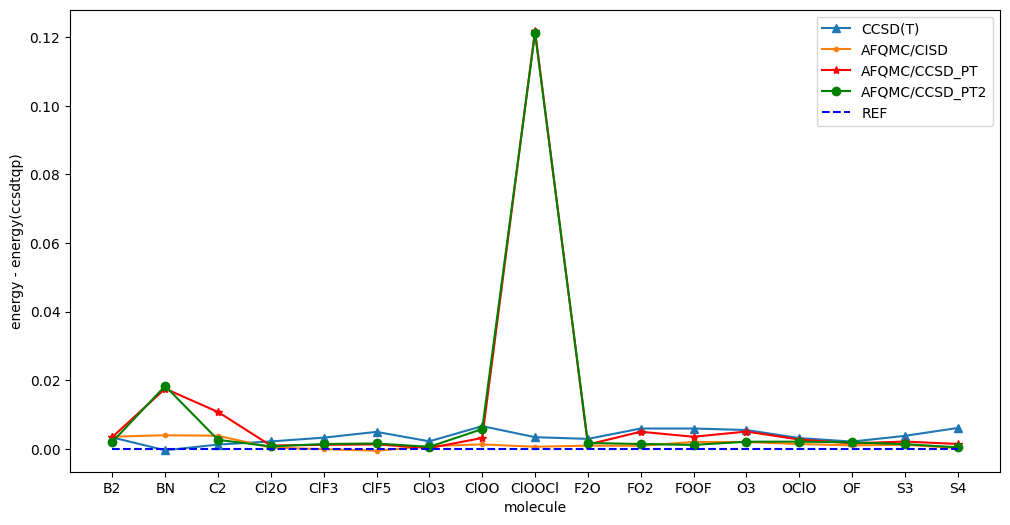

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(mols,ccsd_t-ref,'^-',label='CCSD(T)')
# plt.plot(mols,afqmc_hf-ccsdtqp,'x-',label='AFQMC/HF')
plt.plot(mols,afqmc_cisd-ref,'.-',label='AFQMC/CISD')
plt.plot(mols,afqmc_ccsd_pt-ref,'*-',color='red',label='AFQMC/CCSD_PT')
plt.plot(mols,afqmc_ccsd_pt2-ref,'o-',color='green',label='AFQMC/CCSD_PT2')
plt.plot(mols,[0]*len(mols),'--',color='b',label='REF')
plt.xlabel('molecule')
plt.ylabel('energy - energy(ccsdtqp)')
plt.legend()
plt.show()

In [33]:
mols = mols.tolist()
mols.remove('BN')
mols.remove('ClOOCl')
print(mols)

['B2', 'C2', 'Cl2O', 'ClF3', 'ClF5', 'ClO3', 'ClOO', 'F2O', 'FO2', 'FOOF', 'O3', 'OClO', 'OF', 'S3', 'S4']


In [34]:
ccsd_t = []
ref = []
afqmc_hf = []
afqmc_cisd = []
afqmc_ccsd_pt = [] 
afqmc_ccsd_pt2 = []
mols
for mol in mols:
    ccsd_t = np.hstack((ccsd_t,data_dict[mol]['ccsd_t']))
    ref = np.hstack((ref,data_dict[mol]['ref']))
    afqmc_hf = np.hstack((afqmc_hf,data_dict[mol]['afqmc_hf']))
    afqmc_cisd = np.hstack((afqmc_cisd,data_dict[mol]['afqmc_cisd']))
    afqmc_ccsd_pt = np.hstack((afqmc_ccsd_pt,data_dict[mol]['afqmc_ccsd_pt']))
    afqmc_ccsd_pt2 = np.hstack((afqmc_ccsd_pt2,data_dict[mol]['afqmc_ccsd_pt2']))

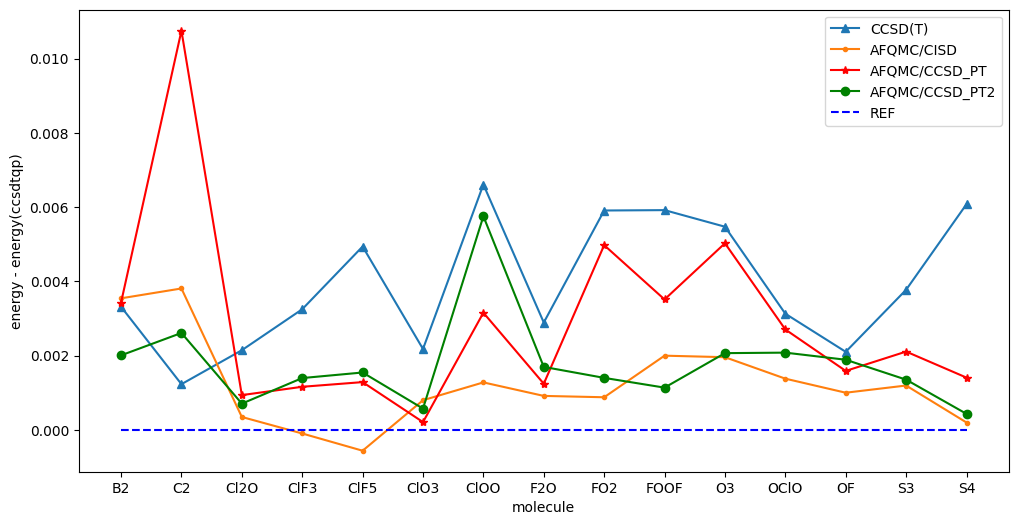

In [35]:
plt.figure(figsize=(12, 6))
plt.plot(mols,ccsd_t-ref,'^-',label='CCSD(T)')
# plt.plot(mols,afqmc_hf-ccsdtqp,'x-',label='AFQMC/HF')
plt.plot(mols,afqmc_cisd-ref,'.-',label='AFQMC/CISD')
plt.plot(mols,afqmc_ccsd_pt-ref,'*-',color='red',label='AFQMC/CCSD_PT')
plt.plot(mols,afqmc_ccsd_pt2-ref,'o-',color='green',label='AFQMC/CCSD_PT2')
plt.plot(mols,[0]*len(mols),'--',color='b',label='REF')
plt.xlabel('molecule')
plt.ylabel('energy - energy(ccsdtqp)')
plt.legend()
plt.show()